In [4]:
import pandas as pd

filename = r'C:\\sqlite\\mysql\\code\\11_1\\chipotle.tsv'
df = pd.read_csv(filename, sep='\t')

# 전체적인 수량 파악

In [5]:
df[['choice_description','item_name']].value_counts()

choice_description                                                                                                       item_name         
[Coke]                                                                                                                   Canned Soft Drink     102
[Diet Coke]                                                                                                              Canned Soft Drink      95
[Sprite]                                                                                                                 Canned Soft Drink      55
[Lemonade]                                                                                                               Canned Soft Drink      31
[Coca Cola]                                                                                                              Canned Soda            26
                                                                                                                             

In [6]:
df[['choice_description']].value_counts()

choice_description                                                                                                     
[Diet Coke]                                                                                                                134
[Coke]                                                                                                                     123
[Sprite]                                                                                                                    77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                      42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                           40
                                                                                                                          ... 
[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Cheese, Guacamole, Lettuce]]                                     

In [7]:
df[['item_name']].value_counts()

item_name                            
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatil

# Chicken Bowl 추출

In [8]:
item_name = df.groupby(['item_name']).size() # item_name - Chicken Bowl 추출

In [9]:
Chicken_Bowl = df[(df.item_name=='Chicken Bowl')]

In [10]:
Chicken_Bowl[['choice_description']] # Chicken Bowl 메뉴 추출

,choice_description
4,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans..."
5,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou..."
13,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,..."
19,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."
26,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea..."
...,...
4590,"[Roasted Chili Corn Salsa, [Rice, Black Beans,..."
4591,"[Tomatillo Red Chili Salsa, [Rice, Black Beans..."
4595,"[Tomatillo Green Chili Salsa, [Rice, Black Bea..."
4599,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]"


In [11]:
Chicken_Bowl.isnull().sum() # 결측치 확인

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

In [12]:
choice_description = Chicken_Bowl.groupby(['choice_description']).size() # choice_description 그룹화

In [48]:
item_price = Chicken_Bowl.groupby(['item_price']).size() # item_price 그룹화

# Chicken Bowl 물가 상승률 가격대 수요 조사

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '$8.75 '),
  Text(1, 0, '$11.25 '),
  Text(2, 0, '$8.49 '),
  Text(3, 0, '$10.98 '),
  Text(4, 0, '$17.50 '),
  Text(5, 0, '$16.98 '),
  Text(6, 0, '$21.96 '),
  Text(7, 0, '$22.50 '),
  Text(8, 0, '$8.19 '),
  Text(9, 0, '$8.50 '),
  Text(10, 0, '$10.58 '),
  Text(11, 0, '$26.25 '),
  Text(12, 0, '$32.94 ')])

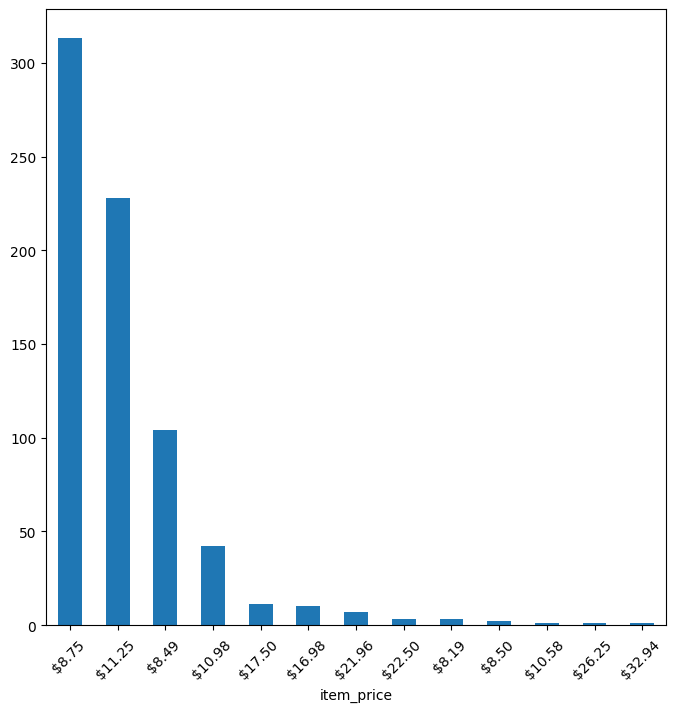

In [50]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(8,8)) 
item_price_sort = item_price.sort_values(ascending=False)
item_price_sort.plot(kind='bar',stacked=True)
plt.xticks(rotation=45)
# 중간가격대 선호

# 비싼가격대선호 X 낮은가격~ 중간가격 선호

# Chicken Bowl 과 전체메뉴 선호 가격대 비교

In [13]:
df_item_price = df.groupby(['item_price']).size() # 전체가격대 그룹화

# 전체메뉴 그래프화

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '$8.75 '),
  Text(1, 0, '$11.25 '),
  Text(2, 0, '$9.25 '),
  Text(3, 0, '$4.45 '),
  Text(4, 0, '$8.49 '),
  Text(5, 0, '$11.75 '),
  Text(6, 0, '$1.25 '),
  Text(7, 0, '$8.99 '),
  Text(8, 0, '$2.15 '),
  Text(9, 0, '$2.95 '),
  Text(10, 0, '$1.50 '),
  Text(11, 0, '$1.09 '),
  Text(12, 0, '$2.39 '),
  Text(13, 0, '$10.98 '),
  Text(14, 0, '$1.69 ')])

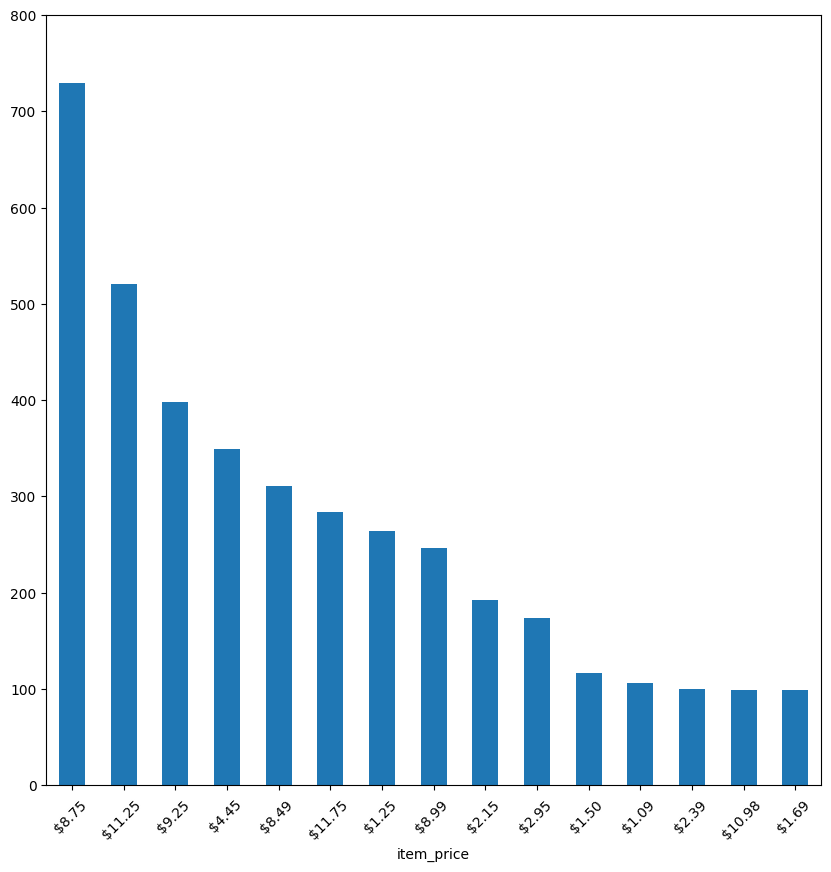

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10)) # 전체 메뉴 가격대 선호도 조사
plt.ylim([0, 800])
df_item_price_sort = df_item_price.sort_values(ascending=False)
df_item_price_sort[:15].plot.bar()
plt.xticks(rotation=45)

# 전체적으로 낮은가격대~ 중간가격대 선호